# Decathlon Tutorial

In [1]:
library(dbscan)
library(ggplot2)
library(MASS)
library(FactoMineR)
library(repr)
library(scatterplot3d)
library(uwot)
library(kernlab)
library(microbenchmark)


Caricamento pacchetto: ‘dbscan’


Il seguente oggetto è mascherato da ‘package:stats’:

    as.dendrogram


Caricamento del pacchetto richiesto: Matrix


Caricamento pacchetto: ‘kernlab’


Il seguente oggetto è mascherato da ‘package:ggplot2’:

    alpha




In [2]:
options(repr.plot.width=6, repr.plot.height=6)

Functions for tSNE.

In [3]:
source("./functions.R")

Opening the data

In [4]:
data(decathlon)

Cars93 contains Data from 93 Cars on Sale in the USA in 1993. Here we have quite many variables, including multiple labels.

In [5]:
head(decathlon)

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points,Competition
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,1,8217,Decastar
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,2,8122,Decastar
KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2,3,8099,Decastar
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,4,8067,Decastar
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,5,8036,Decastar
WARNERS,11.11,7.60,14.31,1.98,48.68,14.23,41.10,4.92,51.77,278.1,6,8030,Decastar


In [7]:
colnames(decathlon)

[1] "100m"        "Long.jump"   "Shot.put"    "High.jump"   "400m"       
 [6] "110m.hurdle" "Discus"      "Pole.vault"  "Javeline"    "1500m"      
[11] "Rank"        "Points"      "Competition"

Change names starting with numbers (they cause errors)

In [8]:
colnames(decathlon)[c(1,5,6,10)] <- c("sprint.100","sprint.400","hurdle.100","sprint.1500")

In [9]:
colnames(decathlon)

[1] "sprint.100"  "Long.jump"   "Shot.put"    "High.jump"   "sprint.400" 
 [6] "hurdle.100"  "Discus"      "Pole.vault"  "Javeline"    "sprint.1500"
[11] "Rank"        "Points"      "Competition"

Count NAs on rows and columns

In [11]:
sum(apply(decathlon,1,function(x) any(is.na(x)))) #how many rows with NA

[1] 0

In [12]:
sum(apply(decathlon,2,function(x) any(is.na(x)))) #how many columns with NA

[1] 0

Which columns they are

In [13]:
apply(decathlon,2,function(x) any(is.na(x)))

sprint.100   Long.jump    Shot.put   High.jump  sprint.400  hurdle.100 
      FALSE       FALSE       FALSE       FALSE       FALSE       FALSE 
     Discus  Pole.vault    Javeline sprint.1500        Rank      Points 
      FALSE       FALSE       FALSE       FALSE       FALSE       FALSE 
Competition 
      FALSE

Change all names to lower case

In [14]:
rownames(decathlon)

[1] "SEBRLE"      "CLAY"        "KARPOV"      "BERNARD"     "YURKOV"     
 [6] "WARNERS"     "ZSIVOCZKY"   "McMULLEN"    "MARTINEAU"   "HERNU"      
[11] "BARRAS"      "NOOL"        "BOURGUIGNON" "Sebrle"      "Clay"       
[16] "Karpov"      "Macey"       "Warners"     "Zsivoczky"   "Hernu"      
[21] "Nool"        "Bernard"     "Schwarzl"    "Pogorelov"   "Schoenbeck" 
[26] "Barras"      "Smith"       "Averyanov"   "Ojaniemi"    "Smirnov"    
[31] "Qi"          "Drews"       "Parkhomenko" "Terek"       "Gomez"      
[36] "Turi"        "Lorenzo"     "Karlivans"   "Korkizoglou" "Uldal"      
[41] "Casarsa"

In [15]:
tolower(rownames(decathlon))

[1] "sebrle"      "clay"        "karpov"      "bernard"     "yurkov"     
 [6] "warners"     "zsivoczky"   "mcmullen"    "martineau"   "hernu"      
[11] "barras"      "nool"        "bourguignon" "sebrle"      "clay"       
[16] "karpov"      "macey"       "warners"     "zsivoczky"   "hernu"      
[21] "nool"        "bernard"     "schwarzl"    "pogorelov"   "schoenbeck" 
[26] "barras"      "smith"       "averyanov"   "ojaniemi"    "smirnov"    
[31] "qi"          "drews"       "parkhomenko" "terek"       "gomez"      
[36] "turi"        "lorenzo"     "karlivans"   "korkizoglou" "uldal"      
[41] "casarsa"

In [16]:
decathlon["Athlete"] <- tolower(rownames(decathlon))

Separate features and labels. Make labels as factors

In [17]:
for(i in c("Rank","Athlete","Competition"))
    decathlon[,i] <- factor(decathlon[,i])

In [18]:
X <- decathlon[,!colnames(decathlon) %in% c("Rank","Athlete","Competition")]

In [19]:
labels <- decathlon[c("Rank","Athlete","Competition")]

## Plot two dimensions

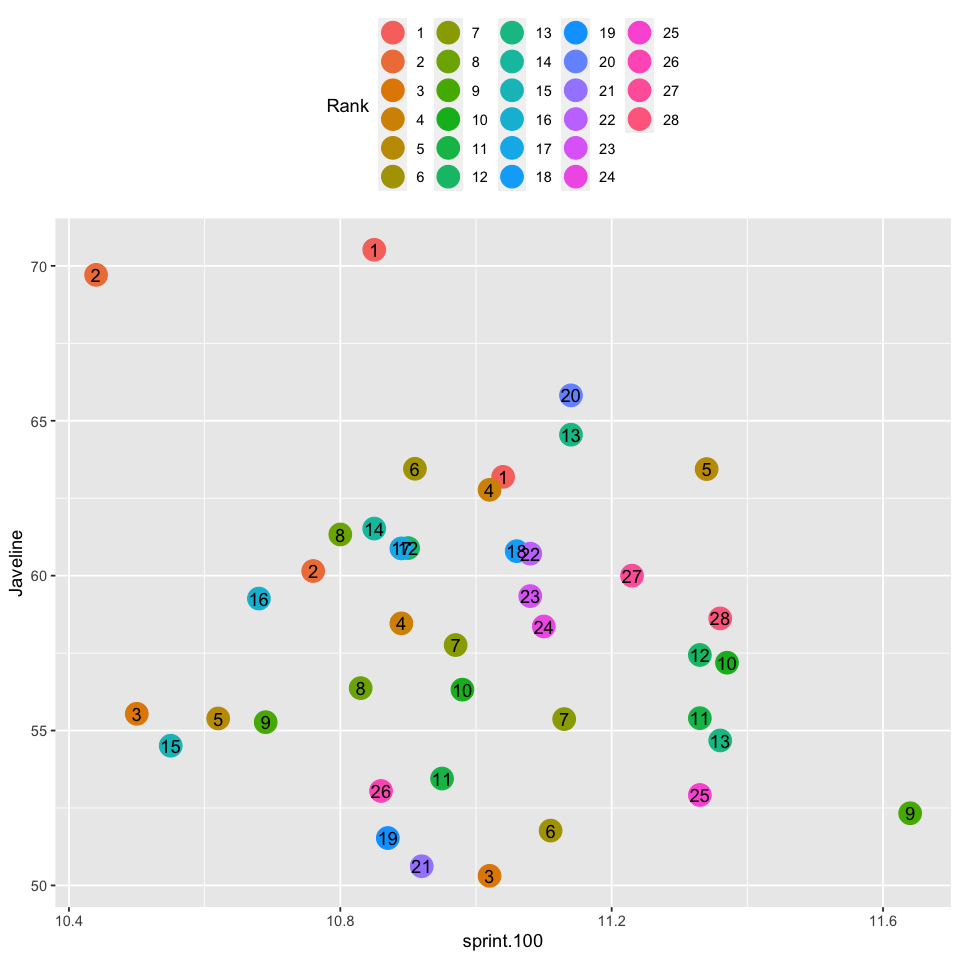

In [22]:
options(repr.plot.width=8, repr.plot.height=8)
ggplot(decathlon, aes(x=sprint.100, y=Javeline, color=Rank)) +
  geom_point(size=6) + geom_text( aes(label=Rank), color="black") +
  theme(legend.position="top")

## Plot three dimensions

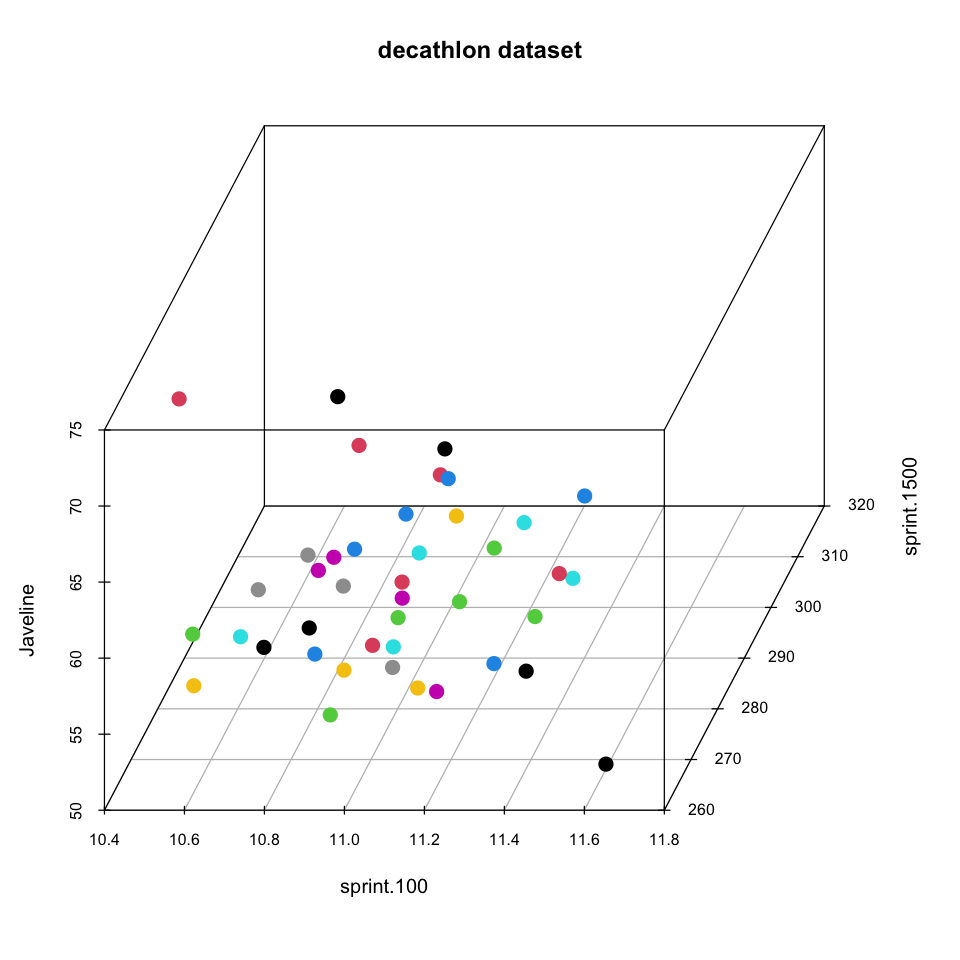

In [25]:
scatterplot3d(decathlon[["sprint.100"]],
              decathlon[["sprint.1500"]],
              decathlon[["Javeline"]],
              xlab="sprint.100",
              ylab="sprint.1500",
              zlab="Javeline",
              color = decathlon[["Rank"]],
              main = "decathlon dataset",
              lwd=5, pch=19, angle=60)

## Curse of dimensionality

Calculate distances in all dimensions for decathlon data and plot the histogram

In [26]:
Distance <-  as.vector(as.matrix( dist(X[,1]) ))
L <- length(Distance)
Dimension <- rep(1, L)
Ndim <- dim(X)[2]
for(n in 2:Ndim){
    Distance <- c(Distance, as.vector(as.matrix( dist(X[,1:n]) )))
    Dimension <- c(Dimension, rep(n, L))
    }

In [27]:
D <- as.data.frame(log(Distance))
colnames(D) <- c("log_distance")
D["dimension"] <- factor(Dimension)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 469 rows containing non-finite values (`stat_bin()`).”


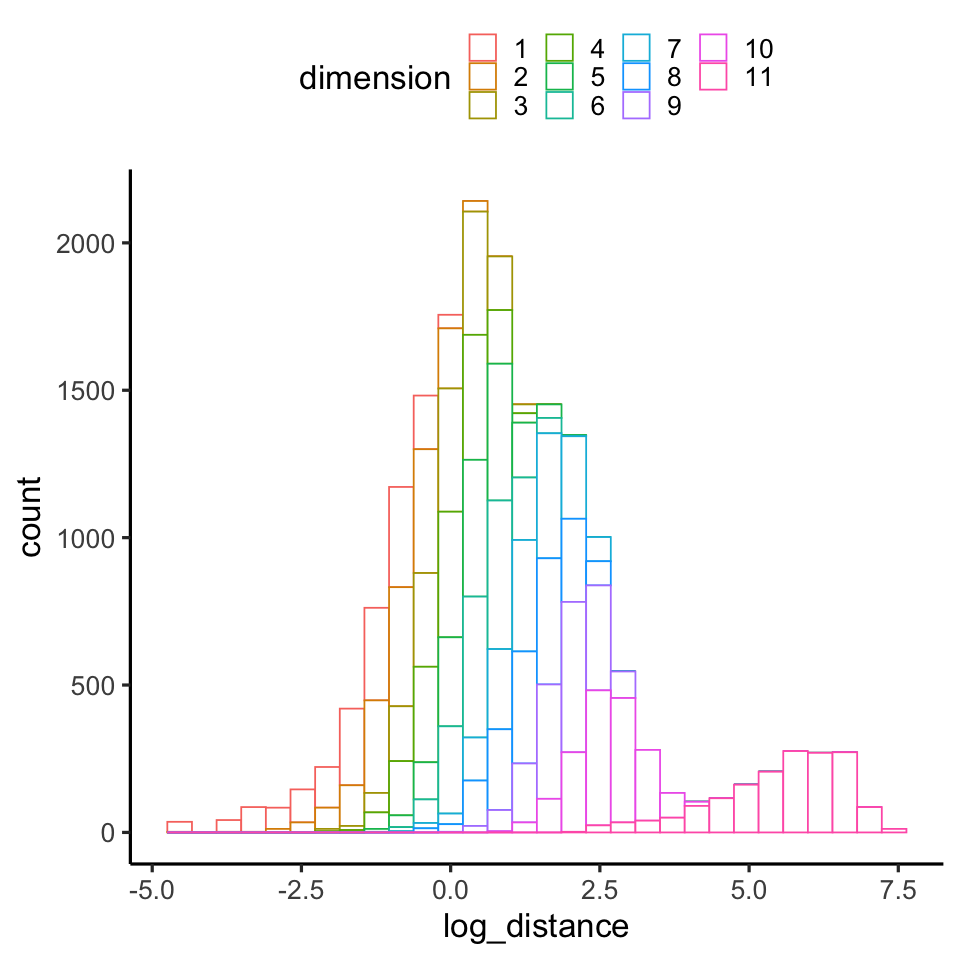

In [28]:
ggplot(D, aes(x=log_distance, color=dimension)) +
  geom_histogram(fill="white") + theme_classic(base_size = 20) +
  theme(legend.position="top")

## Parametric projections

### PCA

The function PCA is part of the package `FactomineR`

In [29]:
PCA = FactoMineR::PCA(X, ncp = 2)

In [30]:
Y_PCA = as.data.frame(PCA$ind$coord)

In [31]:
Y_PCA <- cbind(Y_PCA,labels)

We can already see some type between Ranks.

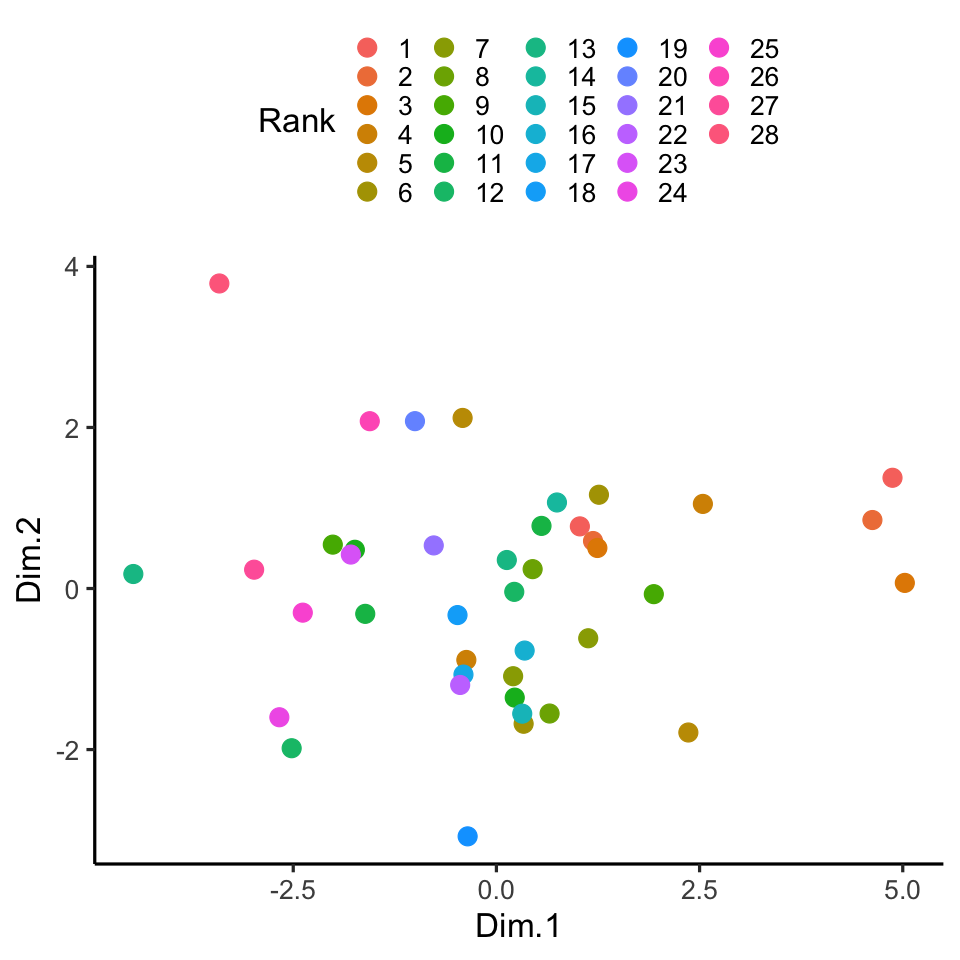

In [32]:
ggplot(Y_PCA, aes(x=Dim.1, y=Dim.2, color=Rank)) +
  geom_point(size=5) + theme_classic(base_size = 20) +
  theme(legend.position="top")

Not really reflecting something on competition level

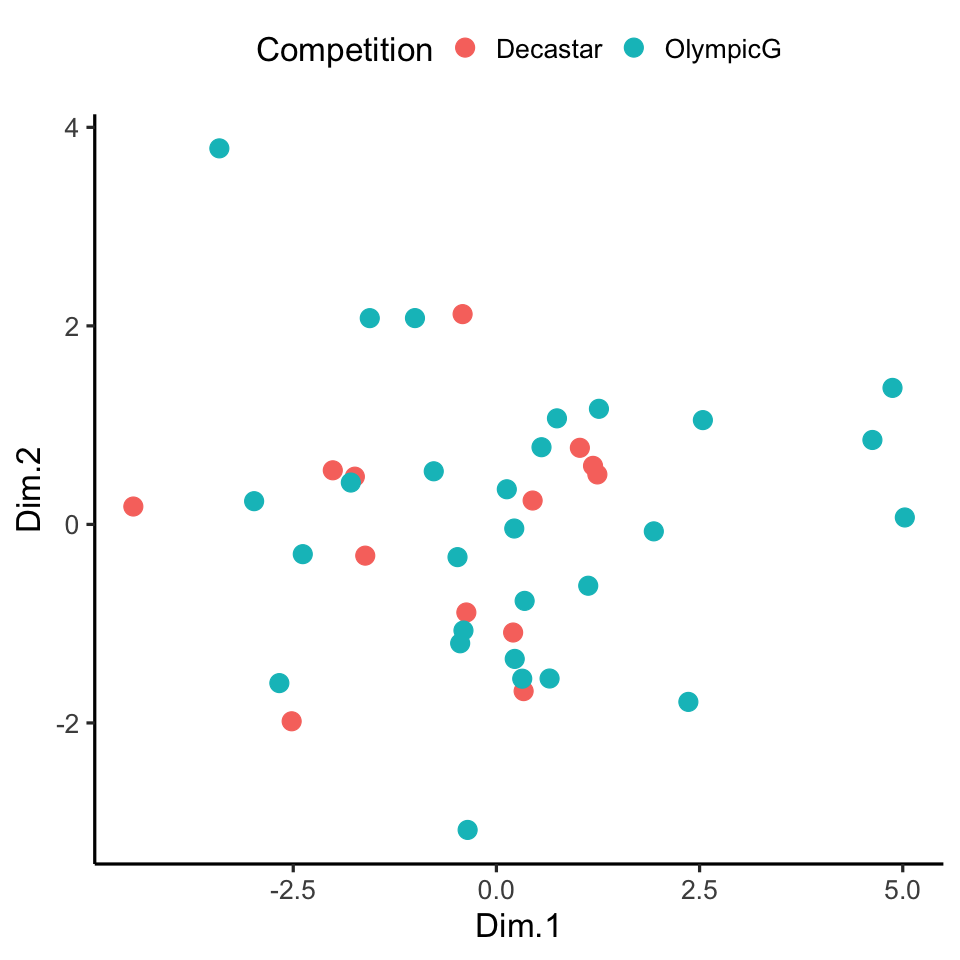

In [33]:
ggplot(Y_PCA, aes(x=Dim.1, y=Dim.2, color=Competition)) +
  geom_point(size=5) + theme_classic(base_size = 20) +
  theme(legend.position="top")

### Kernel PCA 

is contained in the package `kernlab`. Try out other kernel types beyond the gaussian one. Type `help(kpca)` to see how to use the options. Remember to standardize the data first. other packages do that internally.

In [39]:
X_std = apply(X, 2, function(x){(x-mean(x))/sd(x)})

In [61]:
Y_kpca = kernlab::kpca(as.matrix(X_std), 
     features = 2,
     kernel = "rbfdot", 
     kpar = list(sigma = .01),
     th = 1e-4, 
     na.action = na.omit)

In [62]:
Y_kpca = as.data.frame(Y_kpca@pcv)

In [63]:
Y_kpca <- cbind(Y_kpca,labels)

In [64]:
colnames(Y_kpca)[1:2] <- c("Dim.1","Dim.2")

This is as good as the PCA

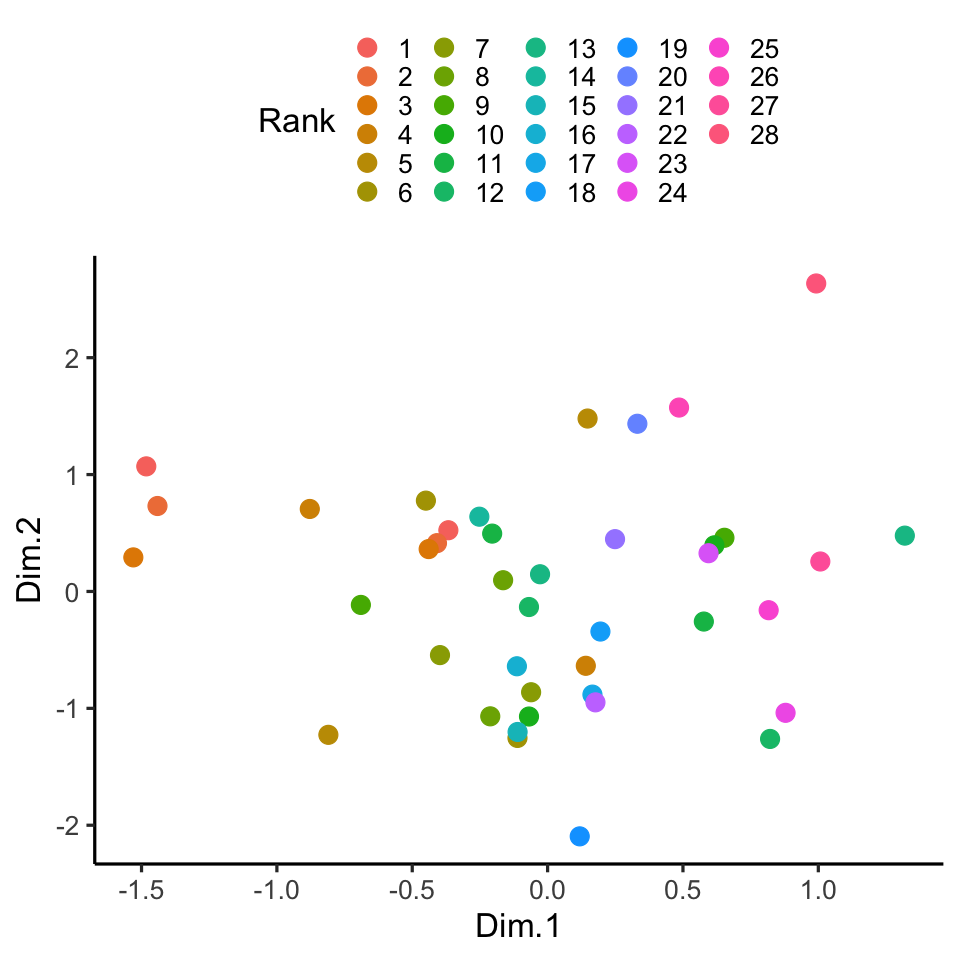

In [65]:
ggplot(Y_kpca, aes(x=Dim.1, y=Dim.2, color=Rank)) +
  geom_point(size=5) + theme_classic(base_size = 20) +
  theme(legend.position="top")

### Linear Discriminant Analysis

contained in the `MASS` package. The functions run a regression based on the projection,so we provide prior probabilities for each class (they give weight to each class). `formula = Rank ~ sprint.100+Long.jump+Shot.put+High.jump+sprint.400+hurdle.100+Discus+Pole.vault+Javeline+sprint.1500+Points` means that those numeric variables are part of the regression (projection) against the Rank. Note we do not use all variables (some are probably collinear, like the price and the maximum price).

In [68]:
Y_lda <- lda(formula = Rank ~ sprint.100+Long.jump+Shot.put+High.jump+sprint.400+hurdle.100+Discus+Pole.vault+Javeline+sprint.1500+Points, 
          data = decathlon)

In [69]:
Y_lda$scaling

,LD1,LD2,LD3,LD4,LD5,LD6,LD7,LD8,LD9,LD10,LD11
sprint.100,263.191007,78.0816256,-63.3549612,-1.03174658,21.68828102,-9.57738210,-13.39025682,-1.118775895,42.3585093,16.76669976,5.08037748
Long.jump,-298.078508,-84.4779174,65.3876687,9.56501945,-26.22581552,9.81716164,8.09250171,1.580326340,-44.2392594,-17.94698999,-6.15125886
Shot.put,-65.882337,-16.3248762,18.6026376,2.35708565,-6.83555183,2.26649196,2.04063403,0.417833095,-11.7096384,-4.26829131,-1.72028741
High.jump,-1109.224350,-287.6397369,248.0554801,32.28410517,-78.66486175,34.14316647,42.44792183,-0.696712858,-165.7570720,-73.51404853,-21.46125570
sprint.400,60.330253,13.2383593,-13.3776602,-0.76207486,4.69908146,-0.75576246,-2.03455317,-0.152203927,8.5181461,4.08555329,1.61331581
hurdle.100,133.023448,39.2119058,-31.0433208,-5.31096888,9.59233289,-3.80832035,-4.64002252,-1.666204510,23.0734998,9.05322832,3.55477404
Discus,-27.155528,-7.3683636,5.3764843,0.18515440,-1.87830073,0.82715473,0.85388889,-0.065728986,-3.9740948,-1.57491366,-0.61364761
Pole.vault,-367.424101,-98.5945665,81.5251094,9.34903744,-26.29415766,11.94637738,14.36853785,0.230381457,-54.9481562,-21.82034802,-9.69686842
Javeline,-17.289019,-4.9742894,3.7495648,0.52441231,-1.49314280,0.39309485,0.71916682,0.009785667,-2.7997769,-1.18522160,-0.44515830
sprint.1500,7.084899,2.2238896,-1.7770389,-0.15636466,0.54063779,-0.23199481,-0.25107645,0.007221315,1.1467965,0.41968524,0.15826279


The scaling factors tell you that on the first component of the projection you have the two regression printed with the code below and so on for the other LD components


In [70]:
Ndim <- dim(Y_lda$scaling)[1]
LD <- as.character(Y_lda$scaling[,"LD1"])
FEATURE <- rownames(Y_lda$scaling)
cat("Regression for LD1 = ")
for(i in 1:Ndim-1) cat(LD[i],"*",FEATURE[i], "+", sep="") 
cat(LD[Ndim],"*",FEATURE[Ndim], "\n\n", sep="")
LD <- as.character(Y_lda$scaling[,"LD2"])
FEATURE <- rownames(Y_lda$scaling)
cat("Regression for LD2 = ")
for(i in 1:Ndim-1) cat(LD[i],"*",FEATURE[i], "+", sep="") 
cat(LD[Ndim],"*",FEATURE[Ndim], sep="")

Regression for LD1 = *+263.191007054696*sprint.100+-298.078508078965*Long.jump+-65.8823366125606*Shot.put+-1109.22434972772*High.jump+60.3302527443529*sprint.400+133.023447823184*hurdle.100+-27.1555282919675*Discus+-367.424101042754*Pole.vault+-17.2890185153404*Javeline+7.08489862503248*sprint.1500+1.17305572908458*Points

Regression for LD2 = *+78.0816256399781*sprint.100+-84.4779174475916*Long.jump+-16.3248761623145*Shot.put+-287.639736887421*High.jump+13.2383593318835*sprint.400+39.2119057961204*hurdle.100+-7.36836364854842*Discus+-98.5945664609616*Pole.vault+-4.97428940840625*Javeline+2.22388957971725*sprint.1500+0.327112630373478*Points

We calculate those features using some good old vectorization in R. First take the coefficients, Then multiply by the data and do the sum by rows.

In [71]:
LD <- list()
Ndim <- dim(Y_lda$scaling)[2]
for(n in 1:Ndim){
    coeff_LD <- matrix(rep(Y_lda$scaling[,paste("LD",n,sep="")],dim(X)[1]),
       nrow=dim(X)[1], byrow=T)
    LD[[n]] <- rowSums(X * coeff_LD)
}

make a proper dataframe and plot

In [72]:
Y_LDAplot <- data.frame( matrix(unlist(LD),
                    nrow=dim(X)[1],
                    byrow=F) )
colnames(Y_LDAplot) <- sapply( 1:Ndim, function(n) paste("LD",n,sep="") )

In [73]:
Y_LDAplot <- cbind(Y_LDAplot,labels)

Clearer rank pattern

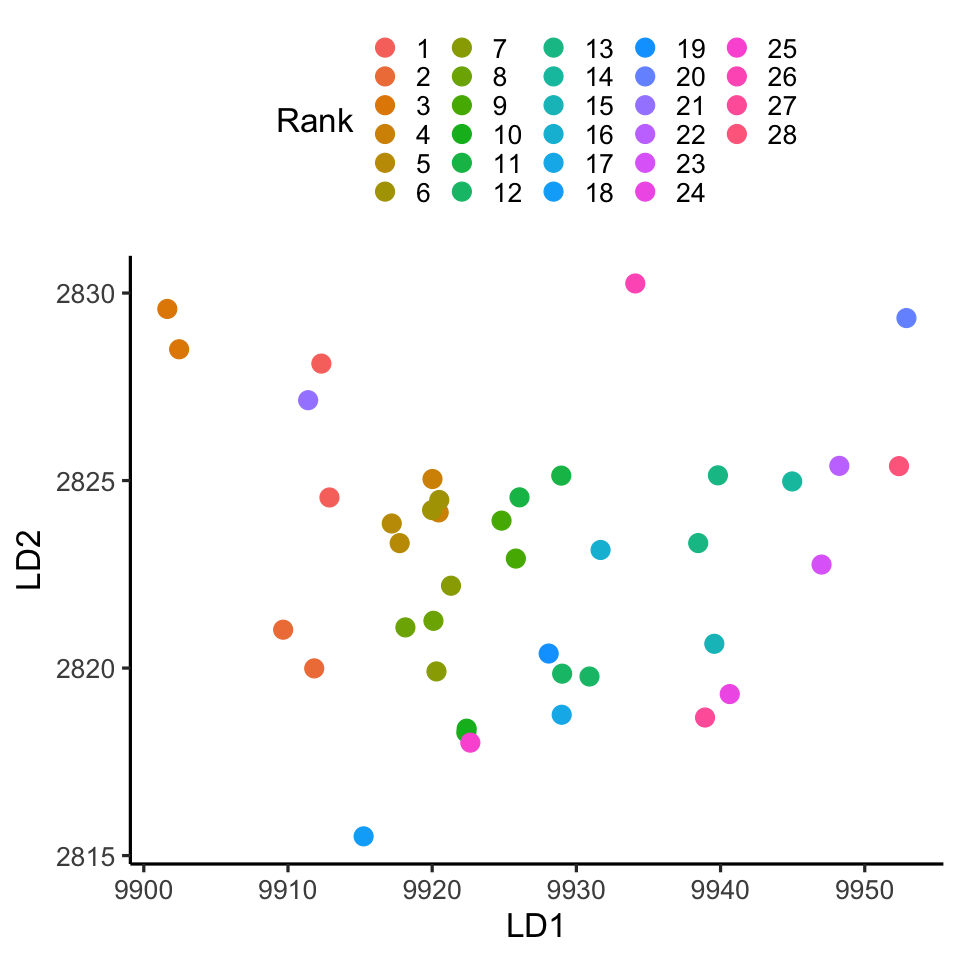

In [75]:
ggplot(Y_LDAplot, aes(x=LD1, y=LD2, color=Rank)) +
  geom_point(size=5) + theme_classic(base_size = 20) +
  theme(legend.position="top")

## Non-parametric methods

### tSNE

From the code in the book or your own improved code. 

Run your personal tSNE function (in my case `sam_tsne`) or the one from the book (`casl_tsne`). Here `init`, `momentum` and `early_ex` are not options found in `casl_tsne`

In [138]:
Y_tsne <- sam_tsne(X_std, init = FALSE,
                    momentum=list(init=.2, final=.5, iter=200L),
                    early_ex=list(factor=10, iter=200L), 
                    perplexity = 7, rho=30)

In [139]:
Y_tsne = as.data.frame(Y_tsne)

In [140]:
colnames(Y_tsne) <- c("tSNE1", "tSNE2")

In [141]:
Y_tsne <- cbind(Y_tsne,labels)

In [142]:
summary(Y_tsne)

     tSNE1             tSNE2               Rank       Athlete     Competition
 Min.   :-2.2303   Min.   :-2.28586   1      : 2   barras : 2   Decastar:13  
 1st Qu.:-0.6404   1st Qu.:-0.93213   2      : 2   bernard: 2   OlympicG:28  
 Median : 0.0952   Median : 0.03741   3      : 2   clay   : 2                
 Mean   : 0.0000   Mean   : 0.00000   4      : 2   hernu  : 2                
 3rd Qu.: 0.6807   3rd Qu.: 1.05895   5      : 2   karpov : 2                
 Max.   : 2.2269   Max.   : 2.52772   6      : 2   nool   : 2                
                                      (Other):29   (Other):29                

Not much progress, it changes a lot with various tSNE parameters

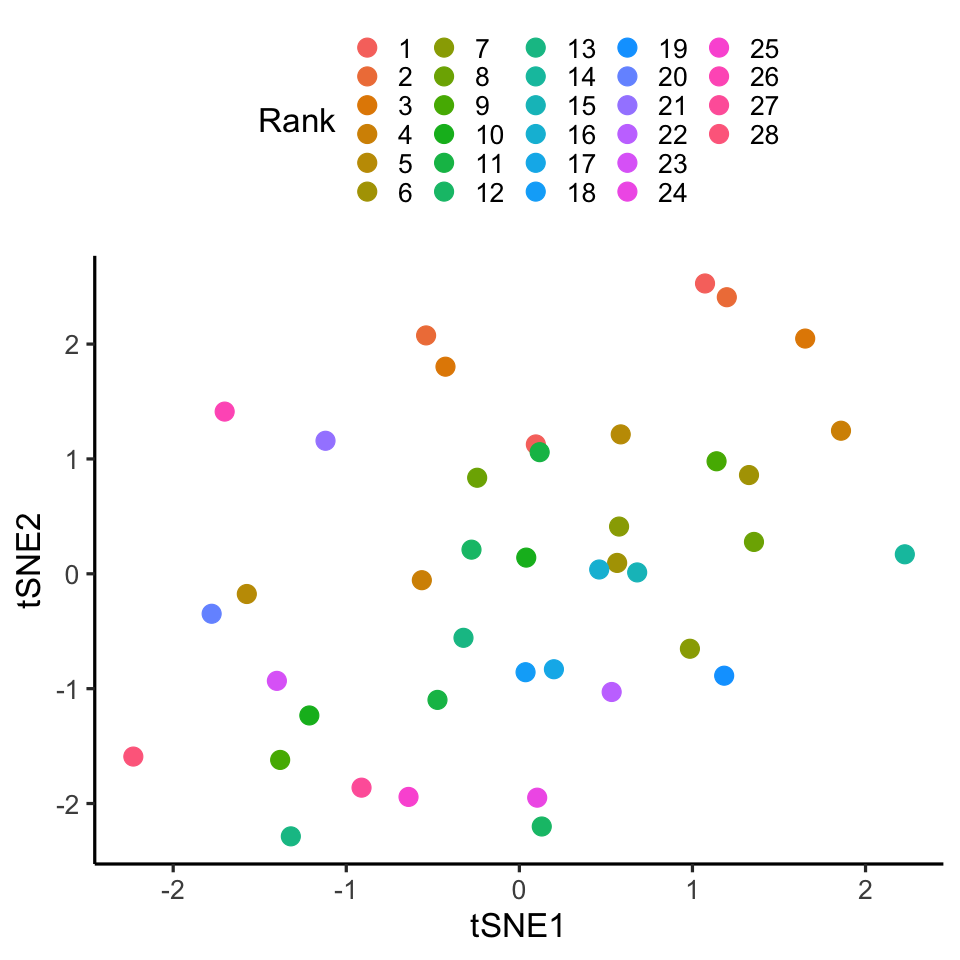

In [143]:
ggplot(Y_tsne, aes(x=tSNE1, y=tSNE2, color=Rank)) +
  geom_point(size=5) + theme_classic(base_size = 20) +
  theme(legend.position="top")

#### Benchmarking the tSNEs 

Benchmarking improved tSNE VS tSNE from the book CASL and showing execution time (in seconds)

In [144]:
MB <- microbenchmark("Improved" = { sam_tsne(X_std, init = PCA$ind$coord,
                                    momentum=list(init=.5, final=.9, iter=200L),
                                    early_ex=list(factor=12, iter=200L), 
                                    perplexity = 10, rho=100) },
                     "CASL" =  { casl_tsne(X_std, init = PCA$ind$coord,
                                    perplexity = 20, rho=100) },
                      times=1 )

In [145]:
MB['time (s)'] = MB['time']/1e9

In [146]:
MB

expr,time,time (s)
<fct>,<dbl>,<dbl>
CASL,9031610967,9.031611
Improved,1524130339,1.524130


### UMAP

part of the package `uwot`

In [147]:
Y_umap <- uwot::umap(X_std, n_neighbors = 10, learning_rate = 0.5, init = "random")

In [148]:
Y_umap = as.data.frame(Y_umap)

In [149]:
colnames(Y_umap) <- c("UMAP1", "UMAP2")

In [150]:
Y_umap <- cbind(Y_umap,labels)

In [151]:
summary(Y_umap)

     UMAP1              UMAP2              Rank       Athlete     Competition
 Min.   :-1.86149   Min.   :-1.8640   1      : 2   barras : 2   Decastar:13  
 1st Qu.:-0.85147   1st Qu.:-1.2204   2      : 2   bernard: 2   OlympicG:28  
 Median : 0.08768   Median :-0.3309   3      : 2   clay   : 2                
 Mean   : 0.00000   Mean   : 0.0000   4      : 2   hernu  : 2                
 3rd Qu.: 0.88531   3rd Qu.: 1.4013   5      : 2   karpov : 2                
 Max.   : 1.37777   Max.   : 2.3652   6      : 2   nool   : 2                
                                      (Other):29   (Other):29                

UMAP does not improve things. It seems the data is mostly organized by rank labels due to the features.

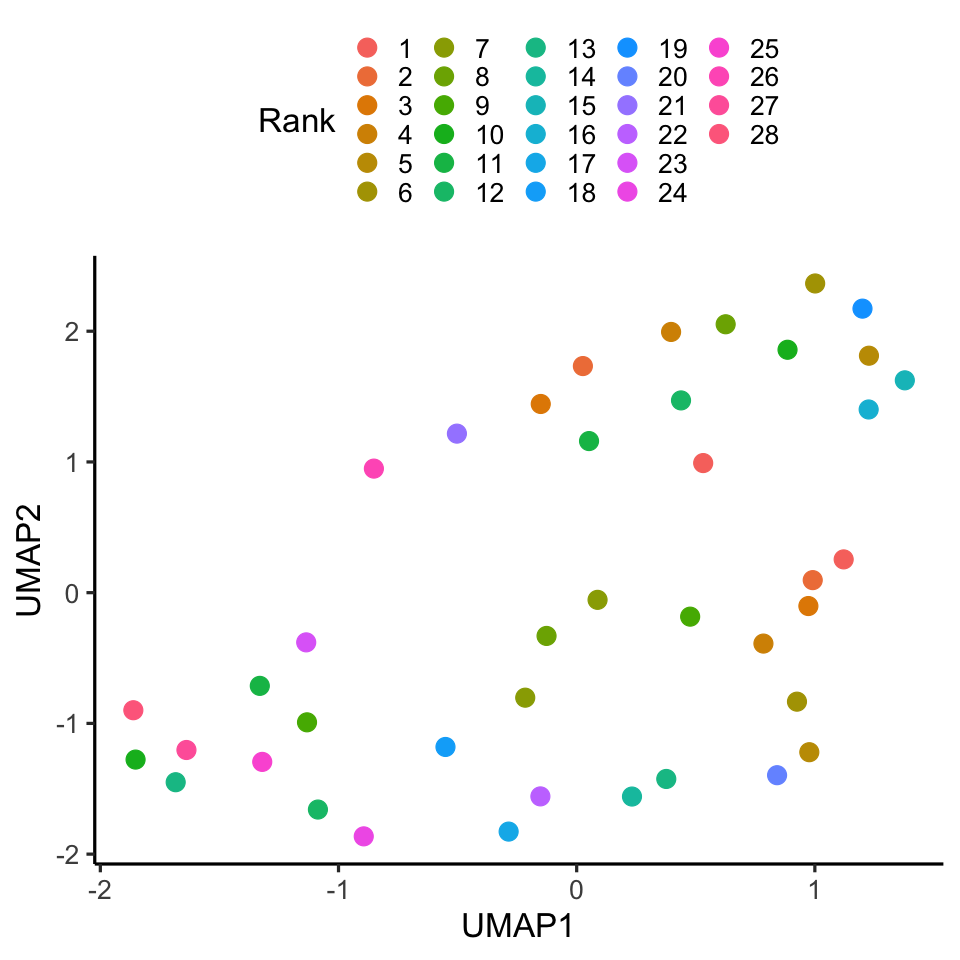

In [153]:
ggplot(Y_umap, aes(x=UMAP1, y=UMAP2, color=Rank )) +
  geom_point(size=5) + theme_classic(base_size = 20) +
  theme(legend.position="top")

Some numeric features like the 100m sprint seem also to follow some projection axis

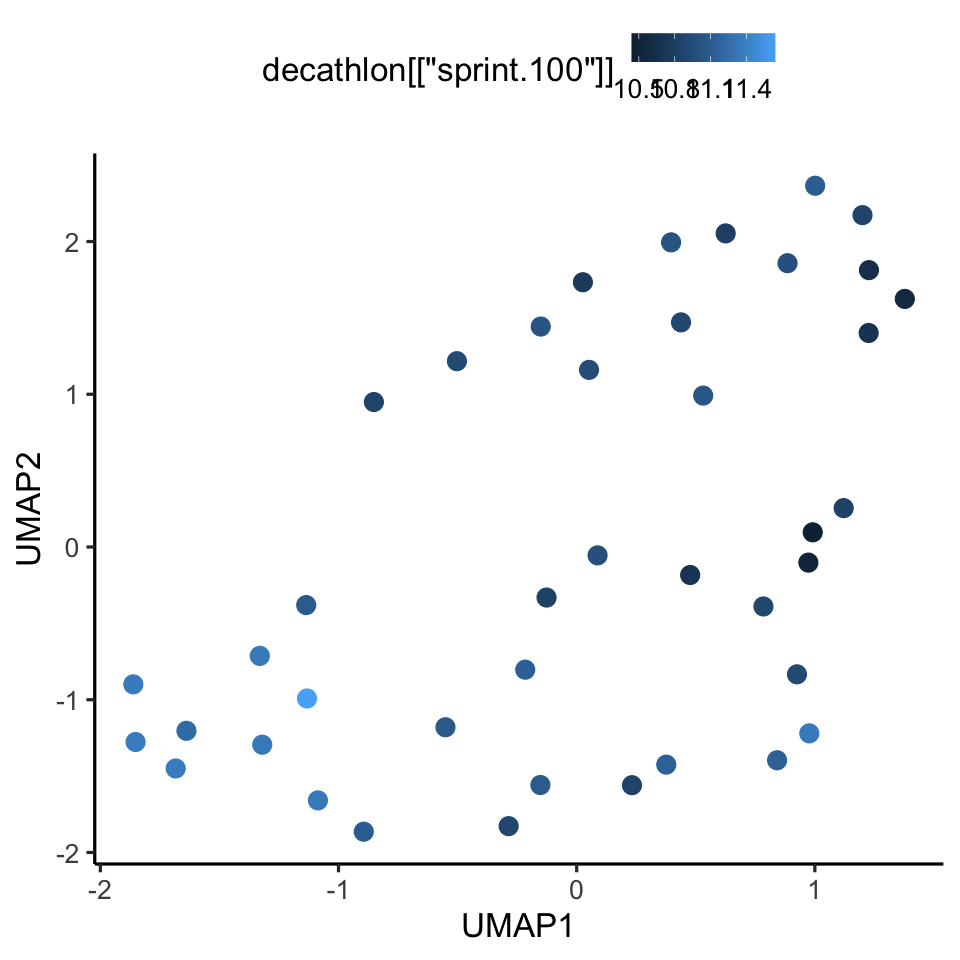

In [155]:
ggplot(Y_umap, aes(x=UMAP1, y=UMAP2, color=decathlon[['sprint.100']] )) +
  geom_point(size=5) + 
  theme_classic(base_size = 20) +
  theme(legend.position="top")

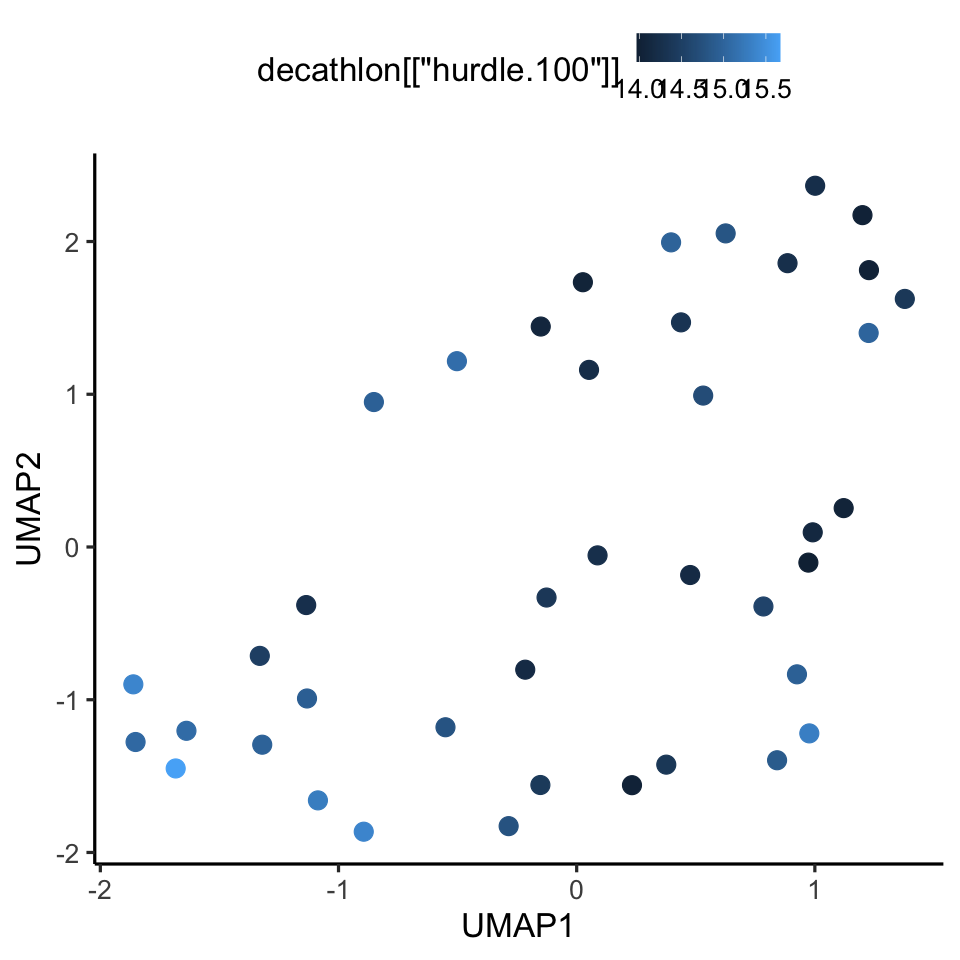

In [156]:
ggplot(Y_umap, aes(x=UMAP1, y=UMAP2, color=decathlon[['hurdle.100']] )) +
  geom_point(size=5) + 
  theme_classic(base_size = 20) +
  theme(legend.position="top")

## k-means clustering

k-means clustering of the umap projection to see some patterns or outliers

In [157]:
res <- stats::kmeans(x=Y_umap[,c("UMAP1","UMAP2")],
              centers=5)

In [158]:
Y_kmeans <- cbind(factor(res$cluster), Y_umap, X)

In [159]:
names(Y_kmeans)[1] <- "Clusters" 

In [160]:
head(Y_kmeans)

,Clusters,UMAP1,UMAP2,Rank,Athlete,Competition,sprint.100,Long.jump,Shot.put,High.jump,sprint.400,hurdle.100,Discus,Pole.vault,Javeline,sprint.1500,Points
,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
SEBRLE,3,0.53116675,0.9913802,1,sebrle,Decastar,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,8217
CLAY,3,0.02604808,1.7334421,2,clay,Decastar,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,8122
KARPOV,3,-0.15086893,1.4434006,3,karpov,Decastar,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2,8099
BERNARD,4,0.39639639,1.9944207,4,bernard,Decastar,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,8067
YURKOV,1,0.97674661,-1.2203557,5,yurkov,Decastar,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,8036
WARNERS,4,1.00133632,2.3652343,6,warners,Decastar,11.11,7.60,14.31,1.98,48.68,14.23,41.10,4.92,51.77,278.1,8030


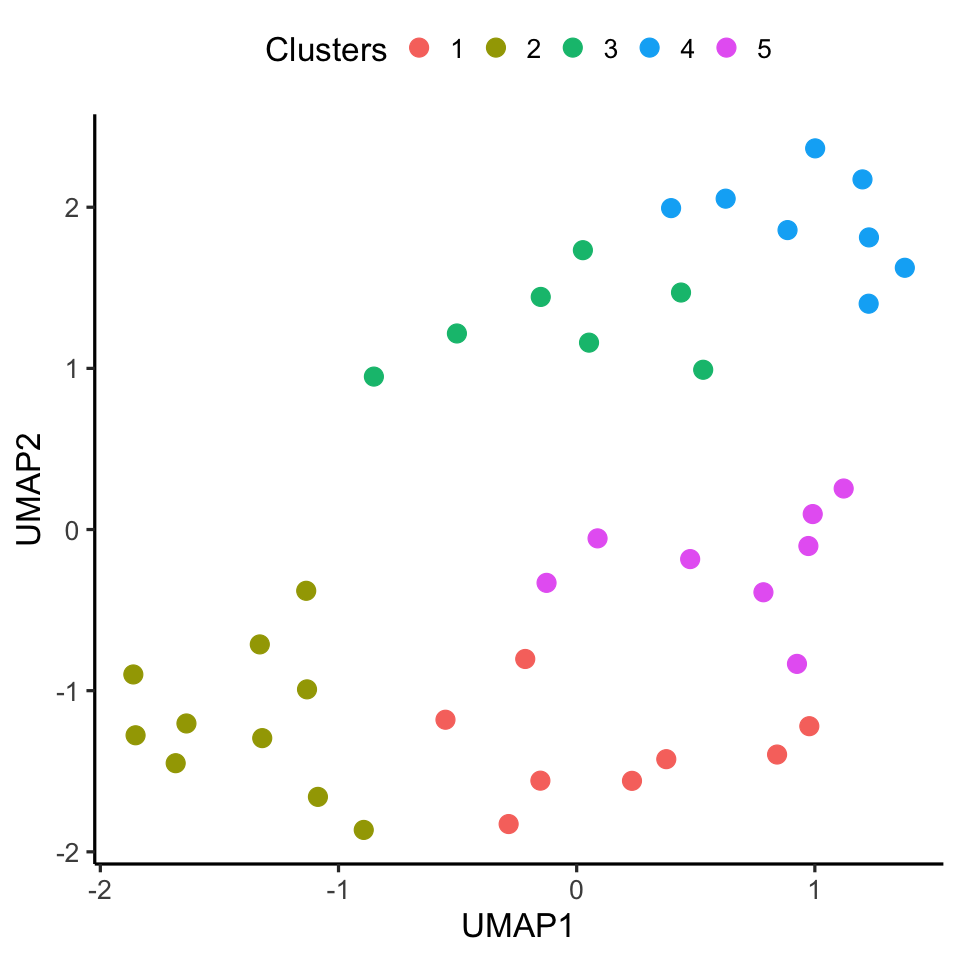

In [161]:
ggplot(Y_kmeans, aes(x=UMAP1, y=UMAP2, color=Clusters, )) +
  geom_point(size=5) + theme_classic(base_size = 20) +
  theme(legend.position="top")

Each cluster has a different average of 100m sprint

In [174]:
A1 <- aggregate(. ~ Clusters, Y_kmeans[c("sprint.100","Clusters")], mean )
print(A1)

  Clusters sprint.100
1        1   11.07875
2        2   11.31300
3        3   10.92143
4        4   10.82875
5        5   10.76000


In [175]:
A2 <- aggregate(. ~ Clusters, Y_kmeans[c("sprint.100","Clusters")], min )

In [176]:
A3 <- aggregate(. ~ Clusters, Y_kmeans[c("sprint.100","Clusters")], max )

In [177]:
A1[,c("min.sprint.100","max.sprint.100")] <- c(A2[,2],A3[,2])

In [178]:
A1

Clusters,sprint.100,min.sprint.100,max.sprint.100
<fct>,<dbl>,<dbl>,<dbl>
1,11.07875,10.85,11.34
2,11.31300,11.08,11.64
3,10.92143,10.76,11.04
4,10.82875,10.55,11.11
5,10.76000,10.44,10.97
